In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from Transitive_Annotation_Utils import *

rcParams = {'font.size': 20 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}


Dorea 0 199.0
Mediterraneibacter 1 528.0
Dialister 2 222.0


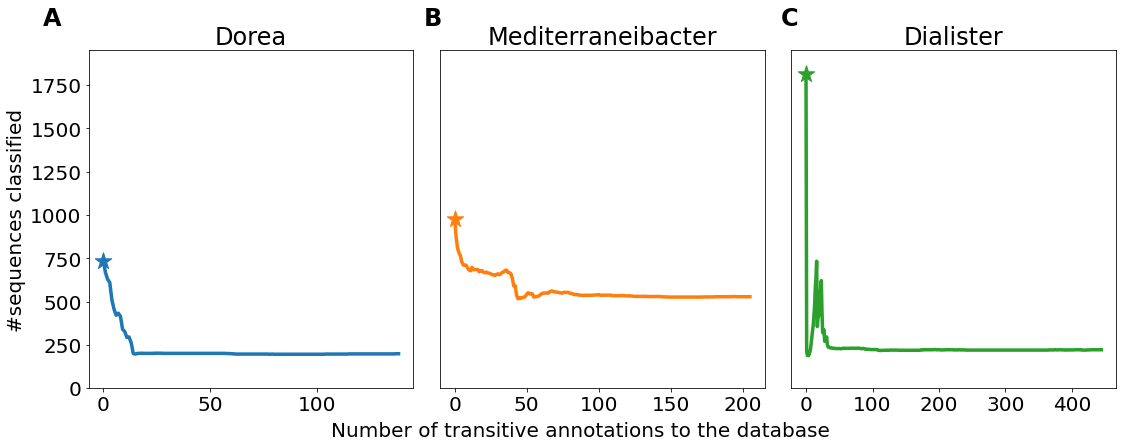

In [2]:
plt.rcParams.update(rcParams)

plots_dir = '/Users/harihara/Research-Activities/Plots/RDP_Outlier_Analysis/'
if not isdir(plots_dir):
    mkdir(plots_dir)
    
data_dir = '/Users/harihara/Mount-2/projects/RDP_Outlier_Analysis/RDP_Sensitivity_Analysis/Obfuscating_Taxa/'
samples = listdir(data_dir)
samples = ['Dorea','Mediterraneibacter','Dialister']

fig, ax = plt.subplots(1,3, figsize = (16,6))

colors = ['C0','C1','C2','C3','C4','C5']
i = 0
for s in samples:
    if s.startswith('.'): continue
    df = pd.read_csv(data_dir+s+'/Label_Flips.txt', sep = "\t")
    df = df.set_index('Seq_ID')
    df = df[df['genus'] == s]
    seqs = Load_Database(data_dir+s+'/'+s+'.fasta')
    idx = []
    for r in list(seqs.keys()):
        idx.append(r.split('$')[1])
        
    del df['Unnamed: 0']
    df = df.loc[idx[:len(df)]]
    
    ax[i].plot([df.iloc[0]['counts(wo-adv)']]+df['counts(adv)'].tolist(), color = colors[i], linewidth = 3.5)
    ax[i].scatter(0, df.iloc[0]['counts(wo-adv)'], color = colors[i], marker = '*', s = 300)
    
    ax[i].set_title(s)
    print(s, i, df['counts(adv)'].tolist()[-1])
    ax[i].set_ylim([0, 1950])
    if i == 0:
        ax[i].set_ylabel('#sequences classified')
    if i > 0:
        ax[i].set_yticks([])
    i += 1
fig.text(0.3,0, 'Number of transitive annotations to the database', fontsize = 20)
fig.text(0.05,0.95,'A', size = 24, fontweight = 'bold')
fig.text(0.38,0.95,'B', size = 24, fontweight = 'bold')
fig.text(0.69,0.95,'C', size = 24, fontweight = 'bold')

fig.tight_layout()
fig.savefig(plots_dir+'Fig-4.pdf')